# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mukhamad Azis Tholib
- **Email:** mukhamadazistholib278[at]gmail[dot]com
- **ID Dicoding:** mukhamadazistholib278

## Menentukan Pertanyaan Bisnis

- At what time do bike rentals peak and reach their lowest?
- During which season do bike rentals peak the most?
- What has been the company's sales performance over the past few years?
- How many people choose registered rentals compared to casual rentals?

## Import Semua Packages/Library yang Digunakan

In [7]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [11]:
print("Information for 'day_df':")
print(day_df.info())

print("\nInformation for 'hour_df':")
print(hour_df.info())


Information for 'day_df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Information for 'hour_df':
<class 'pandas.core.frame.DataFram

In [12]:
# Checking the missing value inside the dataset
day_df.isna().sum()
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Check data duplications
print("Total of data duplication is: ", day_df.duplicated().sum())
print("Total of data duplication is: ", hour_df.duplicated().sum())

Total of data duplication is:  0
Total of data duplication is:  0


In [14]:
#Checking statistics parameter in each dataset
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### ToDo's:
- We will delete the 'instant' and 'workingday' columns. In my opinion, 'workingday' is already represented by 'weekday', and there is no connection for 'instant'.
- Here, we will change the data type from integer to category for the columns 'season', 'mnth', 'holiday', 'weekday', 'weathersit' because they all have data with several variants.
 *Categorical data* is a collection of information in the form of groups.
- We will handle the data type of the 'dteday' column, which was originally 'object', and change it to 'datetime'.
- Changing column names for better readability.
- Converting column contents for better understanding.
- Creating a new column named 'category_days' that indicates whether the contents of the column are weekends or weekdays

In [16]:
#Dropping
day_df.drop(['workingday'], axis = 1, inplace= True)
hour_df.drop(['workingday'], axis = 1, inplace= True)

In [17]:
#Changing itn data type into category
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [18]:
#Changing object tdate into datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [19]:
#Renaming column for readibility
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)


In [20]:
# Converting column contents for better understanding
# Convert 'season' to: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# Convert 'month' to: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Convert 'weather_situation' to: 1:Clear, 2:Misty, 3:Light_RainSnow, 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# Convert 'one_of_week' to: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Convert 'year' to: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Calculating Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100


In [21]:
# Creating a new column named 'category_days' indicating whether it's a weekend or weekdays
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)


In [22]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Too Dry"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Too Humid"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)


We know that:

- We have removed the columns 'instant' and 'workingday' ✓
- The data type in the 'dteday' column has been changed to datetime ✓
- The integer data type in columns 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' has been changed to the category data type ✓
- Column names have been changed for better readability ✓
- Column contents have been converted for better understanding ✓
- A new column named 'category_days' has been created containing 'weekend' or 'weekdays' ✓"

## Exploratory Data Analysis (EDA)

In [23]:
# Viewing the summary of statistical parameters from the 'hour_df' data
hour_df.describe(include="all")


C:\Users\Mukhamad Azis Tholib\AppData\Local\Temp\ipykernel_31156\3430156297.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,731,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Too Humid
freq,NaN,24,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599,NaN,NaN
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN



Based on the summary of statistical parameters above, we can obtain information that there are 17,379 customers. According to the displayed data, the range spans from 00:00 to 23:59, with the average bike rentals occurring at 11:54, having a standard deviation of 6.91.

In [24]:
# Rentals based on hour
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})


,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Based on the above pivot table, it can be seen that customers who rent bikes the most do so at 5:00 PM, while bike rentals are the lowest at 4:00 AM.

In [25]:
# Viewing the summary of statistical parameters from the 'day_df' data
day_df.describe(include="all")


C:\Users\Mukhamad Azis Tholib\AppData\Local\Temp\ipykernel_31156\2860154078.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,731,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,1,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN


Based on the summary of statistical parameters above, we obtain information on a total of 17,379 customers across seasons 1 to 4.

In [26]:
# Viewing the number of rentals per season
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Based on the results, it's evident that fall and summer are the two seasons with the highest counts.

In [27]:
#Viewing the number of rentals each year based on registered and casual customers
day_df.groupby(by="year").agg({
"registered": ["sum"],
"casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Based on the image above, someone who has become a member and those who haven’t yet show quite a significant difference in values. Those who have been members in 2011 totaled 995,851, while those who haven’t become members yet amounted to 247,252.

## Visualization & Explanatory Analysis

### Pertanyaan 1: At what time do bike rentals peak and reach their lowest?

C:\Users\Mukhamad Azis Tholib\AppData\Local\Temp\ipykernel_31156\2381952574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
C:\Users\Mukhamad Azis Tholib\AppData\Local\Temp\ipykernel_31156\2381952574.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])


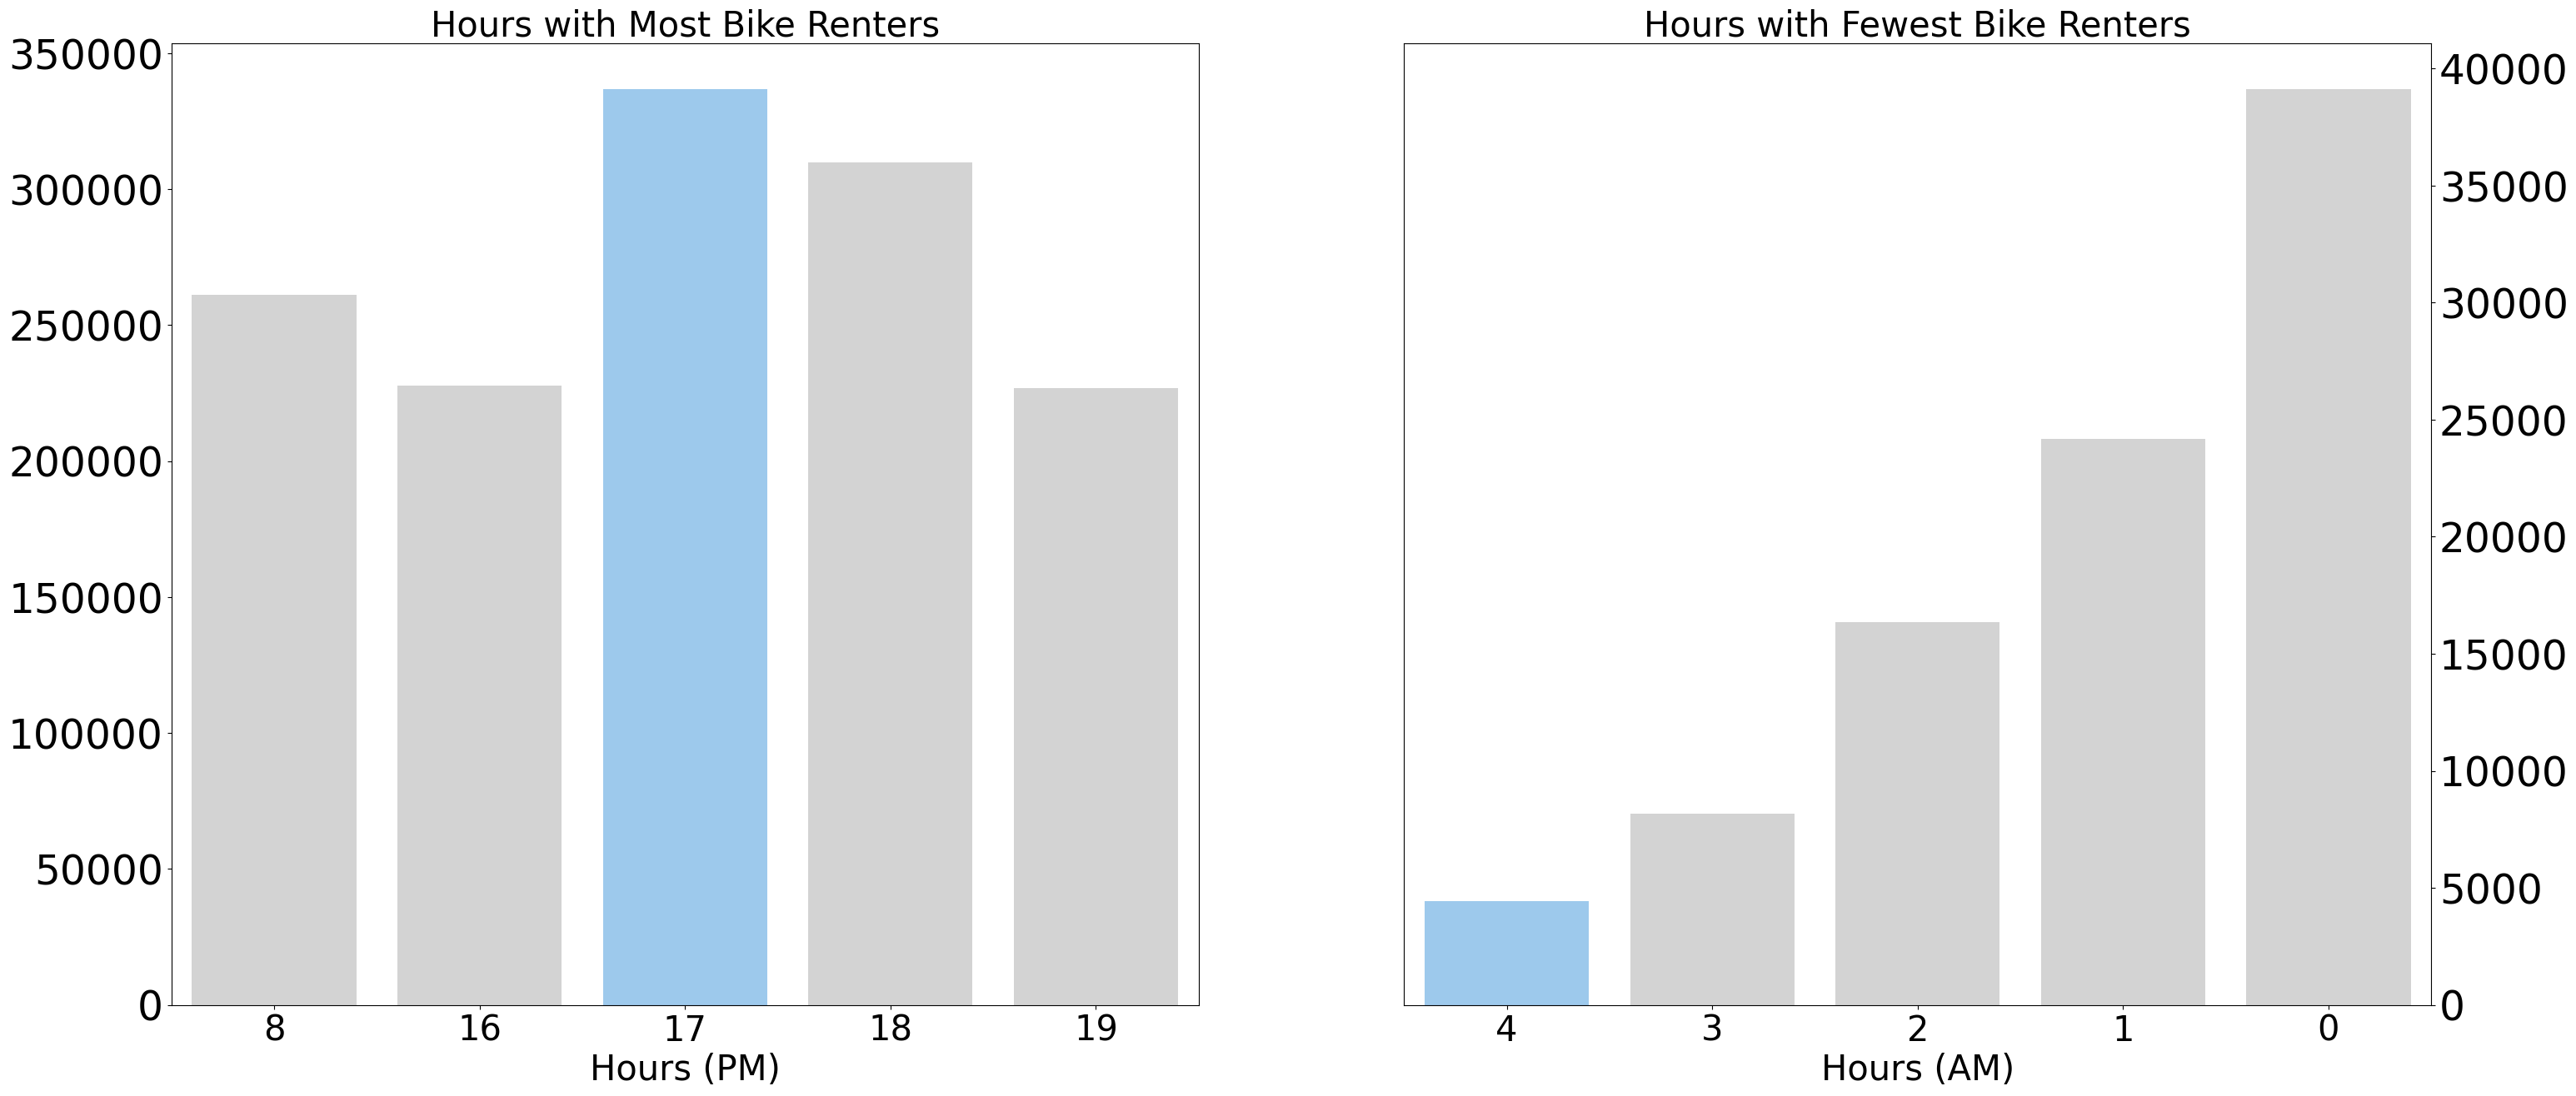

In [28]:
# perform grouping based on hours and count_cr
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

# create a bar chart to visualize bike rental differences by hour
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# create a barplot for the highest bike renters
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])

# set labels and title for the first subplot
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Hours with Most Bike Renters", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# create a barplot for the lowest bike renters
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])

# set labels and title for the second subplot
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Hours with Fewest Bike Renters", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# display plot
plt.show()


Based on the image above, you can see that the bike rentals are most frequently used at 5:00 PM, with around 336,860 rentals. In contrast, the least sold product at 4:00 AM was approximately 4,428 rentals.

### Pertanyaan 2: During which season do bike rentals peak the most?

C:\Users\Mukhamad Azis Tholib\AppData\Local\Temp\ipykernel_31156\2383705016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


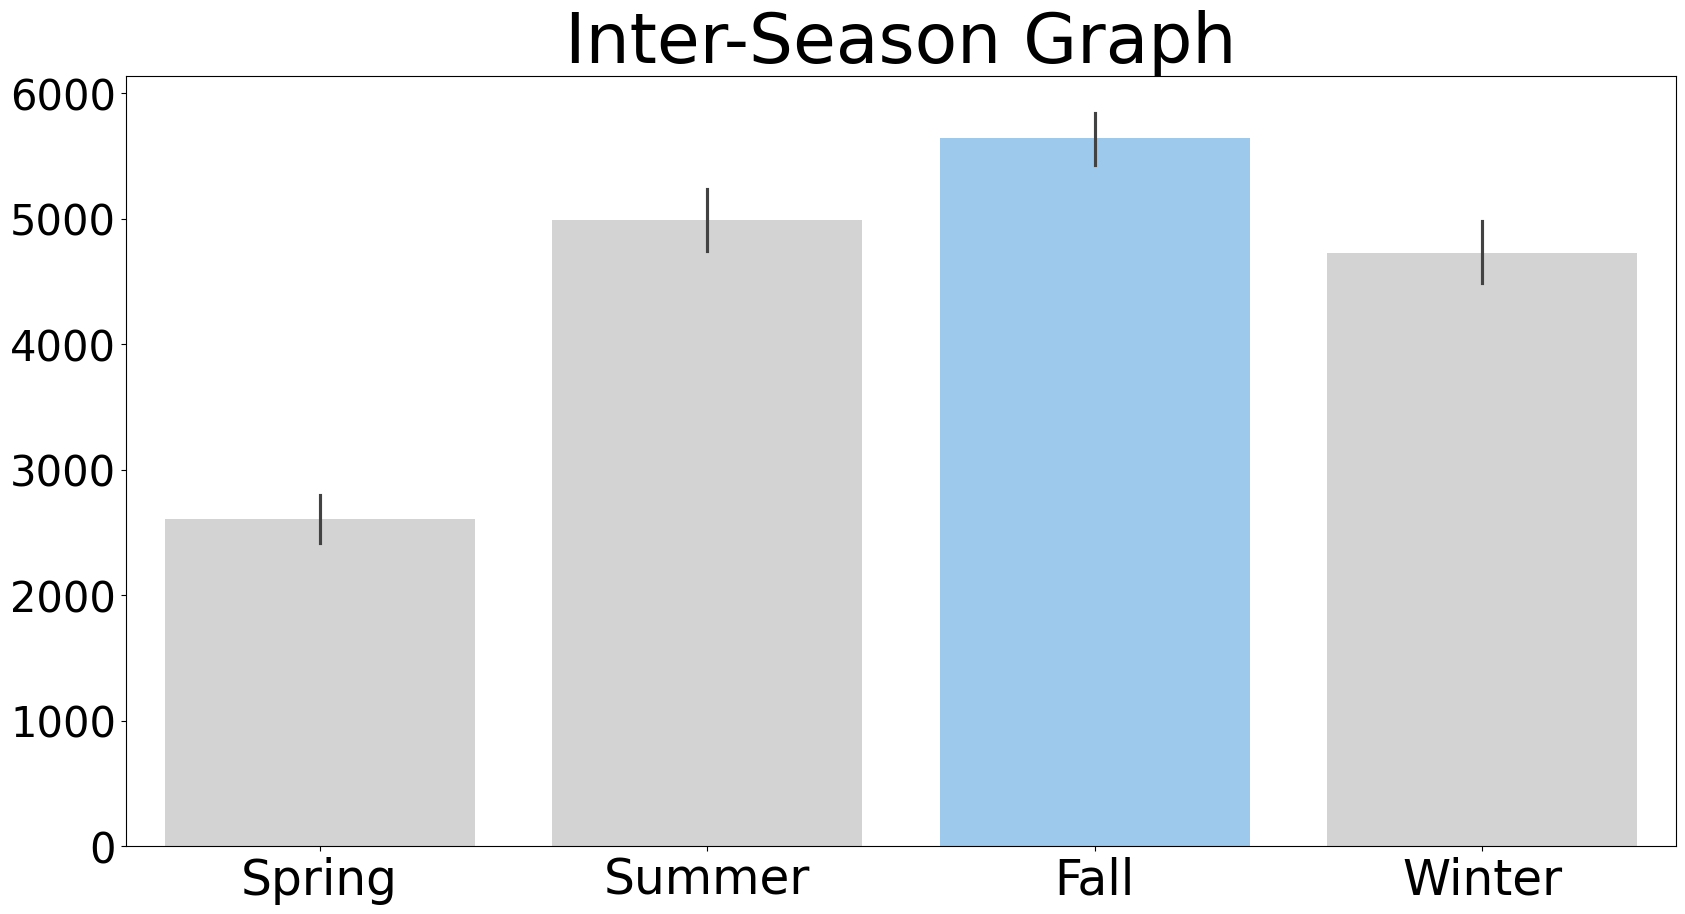

In [29]:
# Set colors
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

# Create a subplot with 1 row and 1 column, sized (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Create a bar plot for y="count_cr" and x="season", using data=day_df
sns.barplot(
    y="count_cr",
    x="season",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors,
    ax=ax
)

# Set title, y and x labels, and tick parameters for the subplot
ax.set_title("Inter-Season Graph", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Display the plot
plt.show()


The most rented season is Fall (autumn), with a total of 1,061,129 rentals during the autumn season.

### Pertanyaan 3: What has been the company's sales performance over the past few years?


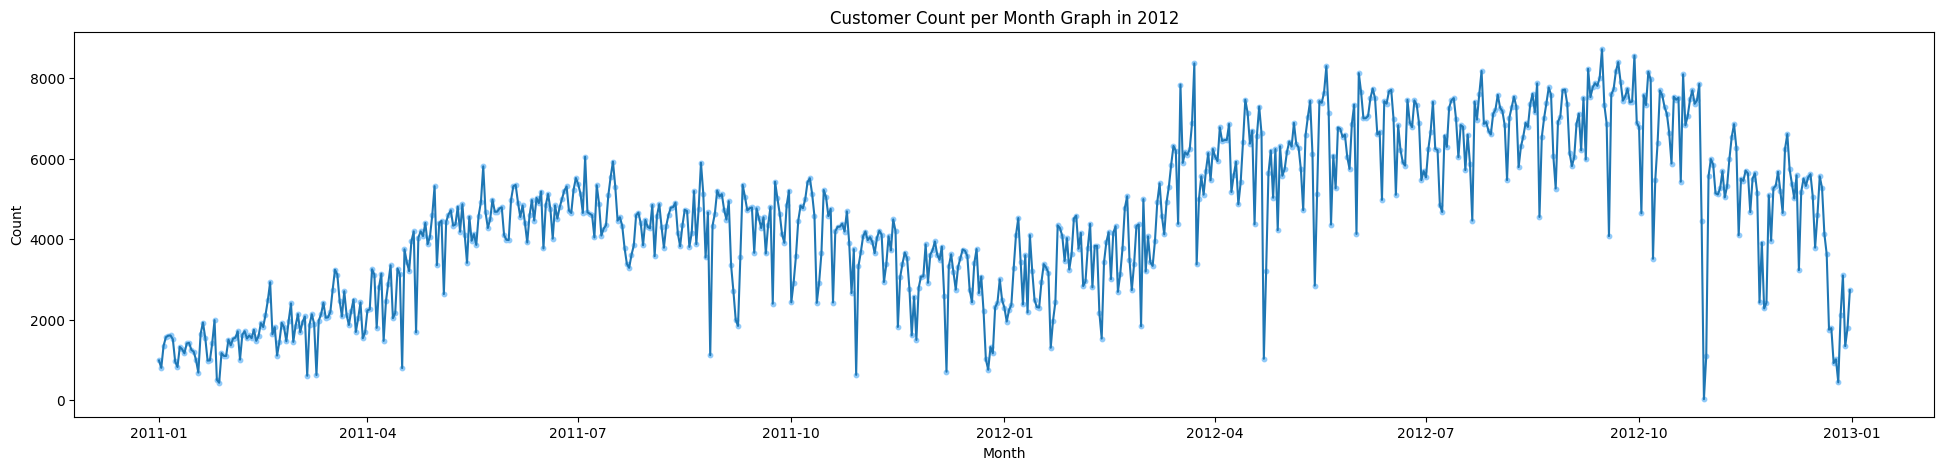

In [30]:
# create a figure with size (24, 5)
plt.figure(figsize=(24, 5))

# calculate the maximum customer count per month
monthly_counts = day_df['count_cr'].groupby(day_df['dteday']).max()

# create a scatter plot for the maximum customer count per month, in blue color and marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# create a line plot for the maximum customer count per month
plt.plot(monthly_counts.index, monthly_counts.values)

# naming the x-axis
plt.xlabel('Month')

# naming the y-axis
plt.ylabel('Count')

# add a title
plt.title('Customer Count per Month Graph in 2012')

# display the plot
plt.show()


Based on the visualization above, we can see that the highest number of orders occurred in September. Additionally, there is a significant decrease in the number of orders in November and December.


### Pertanyaan 4: How many people choose registered rentals compared to casual rentals?

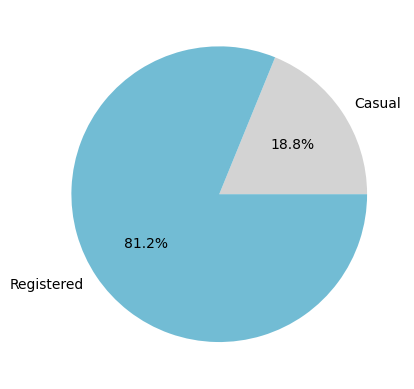

In [31]:
# Summing all elements in the 'casual' column
total_casual = sum(day_df['casual'])

# Summing all elements in the 'registered' column
total_registered = sum(day_df['registered'])

# Creating data for the pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Creating the pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Displaying the pie plot
plt.show()


The customers who has registered is 81.2%, whereas someone who hasn't (casual) is 18.8%.

## Conclusion

- Conclusion question 1: Based on the above chart, you can see that bike rentals are most used at 5:00 PM. In contrast, the least sold products are at 4:00 AM.

- Conclusion question 2: The most rented season is Fall (autumn), with a total of 1,061,129 rentals during the autumn season.

- Conclusion question 3: Based on the visualization above, we can see that the highest number of orders occurred in September 2012. Additionally, there is a significant decrease in the number of orders in January 2011.

- Conclusion question 4: The customers who has registered is 81.2%, whereas someone who hasn't (casual) is 18.8%.

# Continous Analysist


###Clustering Analysist

In [32]:
#Total Users Based on weather_situation
hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

weather_situation
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_cr, dtype: int64

We can identify the user group that tends to rent bikes more on clear days.

In [33]:
#Total Users Based on Humidity
hour_df.groupby(by="humidity_category").agg({"count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Too Dry,3518
Too Humid,8356



We can identify the user group that tends to rent bikes more on very humid days.

###RFM Analysist


The RFM Analysis below is used to understand customer behavior based on three main factors:

- Recency (how recently customers interacted with the business)
- Frequency (how often customers interact)
- Monetary (how much money they spend)

In [34]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602
